# IMDb Data Analysis

This notebook performs an exploratory data analysis of IMDb, highlighting genre trends and production over the decades.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data(filepath):
    try:
        df = pd.read_csv(filepath, sep='\t', low_memory=False)
        print(f'Dataset loaded successfully! {df.shape[0]} rows and {df.shape[1]} columns.')
        return df
    except FileNotFoundError:
        print("File not found. Check the path.")
        return None

In [3]:
def clean_data(df):
    df = df[df['titleType'] == 'movie'].copy()  # Filter only movies and make a copy
    df.dropna(subset=['startYear', 'genres'], inplace=True)  # Remove missing values
    df['startYear'] = pd.to_numeric(df['startYear'], errors='coerce')  # Convert year
    return df

In [4]:
def analyze_data(df):
    genre_counts = df['genres'].str.split(',', expand=True).stack().value_counts().head(10)
    decade_counts = df.assign(decade=(df['startYear'] // 10) * 10)['decade'].value_counts().sort_index()
    return genre_counts, decade_counts

In [5]:
def plot_data(genre_counts, decade_counts):

    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(10, 5))
    genre_counts.plot(kind='bar', color='teal')
    plt.title('Top 10 Movie Genres')
    plt.show()

    plt.figure(figsize=(10, 5))
    decade_counts.plot(kind='bar', color='coral')
    plt.title('Number of Movies per Decade')
    plt.show()

In [6]:
def main():
    
    filepath = '../data/title.basics.tsv'  # File path
    df = load_data(filepath)
    
    if df is not None:  # Check if data was loaded successfully
        df_clean = clean_data(df)
        genre_counts, decade_counts = analyze_data(df_clean)
        plot_data(genre_counts, decade_counts)
    else:
        print("Data loading failed. Exiting the program.")

Dataset loaded successfully! 11424774 rows and 9 columns.


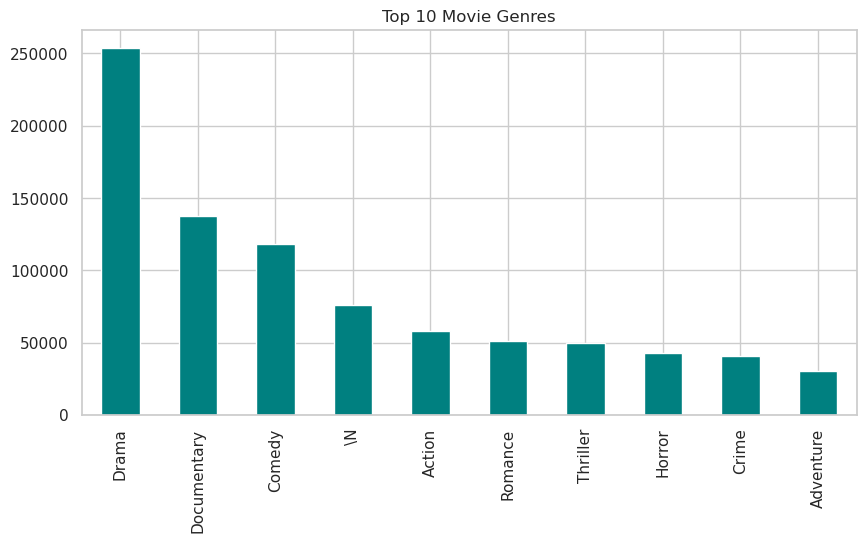

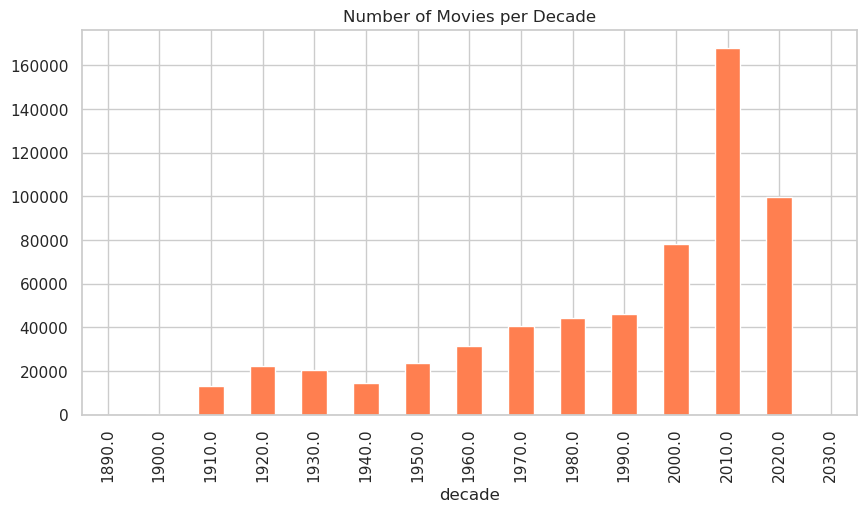

In [7]:
if __name__ == '__main__':
    main()